In [80]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator

In [81]:
train_dir="C:/Studies and Applications/Mini Project/New face training thingy/newfaces"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())
print(classes)

Found 115 images belonging to 3 classes.
['Srivatsan', 'Vyas', 'keshav']


In [82]:
type(train_ds)

keras.preprocessing.image.DirectoryIterator

In [83]:
# import cv2 as cv
# import face_recognition
# import time
# from imutils.video import WebcamVideoStream
# import requests
# #from sort import *
# print("..............")
# Conf_threshold = 0.8
# NMS_threshold = 0.4
# COLORS = [(0, 255, 0), (0, 0, 255), (255, 0, 0),
#           (255, 255, 0), (255, 0, 255), (0, 255, 255)]
# class_name = []
# with open('C:/Studies and Applications/Mini Project/classes.txt', 'r') as f:
#     class_name = [cname.strip() for cname in f.readlines()]
# net = cv.dnn.readNet('C:/Studies and Applications/Mini Project/yolov4-tiny.weights', 'C:/Studies and Applications/Mini Project/yolov4-tiny.cfg')
# model = cv.dnn_DetectionModel(net)
# model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)
# for i in range(len(train_ds)):
#     print(train_ds[i])
#     frame=cv.cvtColor(train_ds[i],cv.COLOR_RGB2BGR)
#     print(type(frame))
#     # classes, scores, boxes = model.detect(train_ds[i], Conf_threshold, NMS_threshold)
#     # for (classid, score, box) in zip(classes, scores, boxes):
#     #     color = COLORS[int(classid) % len(COLORS)]
#     #     label = "%s : %f" % (class_name[classid], score)
#     #     cv.rectangle(train_ds[i], box, color, 1)
        
#     #     if (class_name[classid]=="person"):
#     #         frame=train_ds[i][box[1]:box[3]+box[1],box[0]:box[2]+box[0]]

In [84]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [85]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_56 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_60 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                     

In [86]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
4/4 [==============================] - 5s 940ms/step - loss: 0.7612 - accuracy: 0.6435
Epoch 2/30
4/4 [==============================] - 4s 884ms/step - loss: 0.3326 - accuracy: 0.9913
Epoch 3/30
4/4 [==============================] - 4s 837ms/step - loss: 0.1768 - accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 3s 784ms/step - loss: 0.1082 - accuracy: 0.9913
Epoch 5/30
4/4 [==============================] - 3s 907ms/step - loss: 0.0597 - accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 3s 809ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 3s 810ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 8/30
4/4 [==============================] - 3s 810ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 9/30
4/4 [==============================] - 3s 764ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 10/30
4/4 [==============================] - 3s 776ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 11/30
4/4 [==

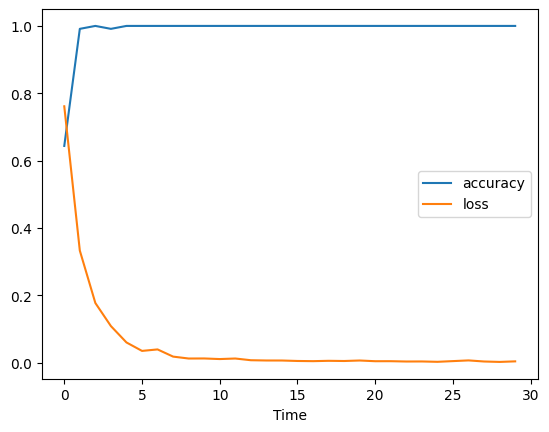

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [88]:
# import cv2 as cv
# Conf_threshold = 0.8
# NMS_threshold = 0.4
# COLORS = [(0, 255, 0), (0, 0, 255), (255, 0, 0),
#           (255, 255, 0), (255, 0, 255), (0, 255, 255)]
# class_name = []
# with open('C:/Studies and Applications/Mini Project/classes.txt', 'r') as f:
#     class_name = [cname.strip() for cname in f.readlines()]
# net = cv.dnn.readNet('C:/Studies and Applications/Mini Project/yolov4-tiny.weights', 'C:/Studies and Applications/Mini Project/yolov4-tiny.cfg')
# model = cv.dnn_DetectionModel(net)
# model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

# path="C:\\Studies and Applications\\Mini Project\\New face training thingy\\Og images\\Srivatsan\\Srivatsan (4).jpg"
# out="New face training thingy/newfaces/Srivatsan_1.jpg"
# frame=cv.imread(path)
# print(frame.shape)
# classes, scores, boxes = model.detect(frame, Conf_threshold, NMS_threshold)
# print(scores)
# for (classid, score, box) in zip(classes, scores, boxes):
#     print("inside....")
#     color = COLORS[int(classid) % len(COLORS)]
#     label = "%s : %f" % (class_name[classid], score)
#     cv.rectangle(frame, box, color, 1)
#     if (class_name[classid]=="person"):
#         print("yess")
#         new_frame=frame[box[1]:box[3]+box[1],box[0]:box[2]+box[0]]
#         cv.imwrite(out,new_frame)


In [92]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print(image_path)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print(pred)
    print("Predicted: "+classes[np.argmax(pred)])

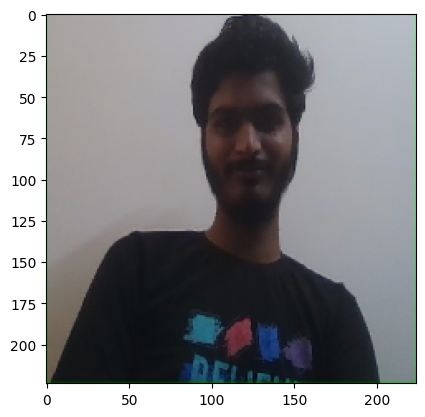

1/1 [==============================] - 0s 25ms/step
C:\Studies and Applications\Mini Project\New face training thingy\newfaces\Srivatsan_121.jpg
Actual: C:\Studies and Applications\Mini Project\New face training thingy\newfaces\Srivatsan
[[0.9875026  0.00535656 0.00714085]]
Predicted: Srivatsan


In [93]:
predict_image("C:\\Studies and Applications\\Mini Project\\New face training thingy\\newfaces\\Srivatsan_121.jpg")

In [91]:
from sklearn.metrics import classification_report
test_dir = "C:/Studies and Applications/Mini Project/New face training thingy/newfaces"
test_generator = ImageDataGenerator().flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
)
y_true = test_generator.classes
y_pred = model.predict(test_generator)
class_indices = test_generator.class_indices
classes = list(class_indices.keys())
report = classification_report(y_true, y_pred.argmax(axis=-1), target_names=classes)
print(report)

Found 115 images belonging to 3 classes.
4/4 [==============================] - 1s 165ms/step
              precision    recall  f1-score   support

   Srivatsan       1.00      1.00      1.00        54
        Vyas       1.00      1.00      1.00        20
      keshav       1.00      1.00      1.00        41

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



In [94]:
model.save('model2.h5')